
# 👩‍💻 Wprowadzenie do Google Colab + prosta regresja liniowa

W tym notatniku:
1. Założysz/zweryfikujesz konto Google.
2. Dowiesz się **jak znaleźć Google Colab z poziomu Gmaila**.
3. Uruchomisz pierwsze komórki i zainstalujesz biblioteki.
4. Zrobisz **proste zadanie z regresją liniową** (przewidywanie ceny mieszkania na podstawie metrażu).
5. Zapiszesz wyniki i **umieścisz projekt na GitHubie**.



## 1) Konto Google – szybka instrukcja
- Wejdź na [accounts.google.com/signup](https://accounts.google.com/signup).
- Wypełnij formularz i **utwórz konto Google** (jeśli już masz – po prostu się zaloguj).
- Po zalogowaniu przejdź do **Gmaila**: [mail.google.com](https://mail.google.com).

## 2) Jak znaleźć **Google Colab** z poziomu Gmaila
1. Będąc w Gmailu, kliknij **menu aplikacji Google** (ikona 9 kropek w prawym górnym rogu).
2. W wyświetlonej siatce aplikacji kliknij **Colab**.  
   > Jeśli nie widzisz Colab na liście: wybierz **„Więcej z Google”** lub wpisz w pasku adresu **https://colab.research.google.com** i naciśnij Enter.
3. W Colab wybierz: **File → Upload notebook** (lub **Plik → Prześlij notatnik**) i wrzuć plik `colab_regresja.ipynb` z tego projektu.

> 💡 Alternatywnie możesz wybrać **File → Save a copy in Drive** i pracować na kopii w swoim Dysku Google.



## 3) Podstawy pracy w Colab
- Komórki **Markdown** (takie jak ta) służą do tekstu i formatowania.
- Komórki **Code** służą do uruchamiania kodu Pythona.
- Uruchamiasz komórkę skrótem **Ctrl+Enter** (lub **Shift+Enter** żeby uruchomić i przejść dalej).
- Po lewej możesz włączyć podgląd **plików** i przeciągać/ładować dane (np. CSV).

Poniżej sprawdzimy wersję Pythona i zainstalujemy biblioteki (jeśli byłoby trzeba).


In [1]:

import sys, platform
print("Wersja Pythona:", sys.version)
print("Platforma:", platform.platform())


Wersja Pythona: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platforma: Linux-6.6.105+-x86_64-with-glibc2.35



## 4) Instalacja bibliotek (tylko jeśli potrzeba)
W Colab większość bibliotek jest już dostępna. Jeśli jednak czegoś brakuje, użyj `pip`:


In [ ]:

# Odkomentuj, jeśli potrzebujesz doinstalować lokalnie lub w niestandardowym środowisku:
!pip install numpy pandas scikit-learn matplotlib



## 5) Dane: `mieszkania.csv`
Masz w projekcie plik z przykładowymi danymi: **metraż (m²)** i **cena (tys. zł)**.

Opcja A – wczytaj lokalny plik (po lewej w Colab kliknij **Files**, wgraj `mieszkania.csv` i uruchom poniższą komórkę):


In [3]:

import pandas as pd

# Jeśli wgrałeś plik do Colab (po lewej zakładka Files) – ta ścieżka zadziała:
df = pd.read_csv("mieszkania.csv")
df.head()


,metraz_m2,cena_tys
0,35,310
1,42,355
2,50,395
3,57,430
4,65,470



**Opcja B – gdy plik jest na GitHubie:** po opublikowaniu repozytorium, kliknij w `mieszkania.csv` na GitHubie, wybierz **Raw** i skopiuj URL. Potem:


In [ ]:

# Przykład (podmień na własny RAW URL z GitHuba):
# raw_url = "https://raw.githubusercontent.com/<twoj-user>/<twoje-repo>/main/mieszkania.csv"
# df = pd.read_csv(raw_url)
# df.head()



## 6) Prosta regresja liniowa
Chcemy przewidzieć **cenę (tys. zł)** na podstawie **metrażu (m²)**.
Kroki:
1. Podziel dane na cechę X (metraż) i cel y (cena).
2. Dopasuj model `LinearRegression`.
3. Obejrzyj parametry (współczynnik i wyraz wolny).
4. Zobacz wykres dopasowania.


Współczynnik (a): 5.435187608739161
Wyraz wolny (b): 122.55816101864565
Przewidywana cena dla 40 m²: 340.0 tys. zł
Przewidywana cena dla 60 m²: 448.7 tys. zł
Przewidywana cena dla 80 m²: 557.4 tys. zł
Przewidywana cena dla 100 m²: 666.1 tys. zł


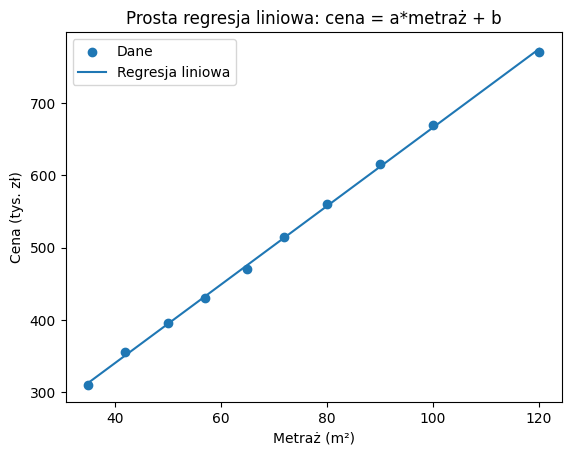

In [4]:

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# X: metraż (m²), y: cena (tys. zł)
X = df[["metraz_m2"]].values
y = df["cena_tys"].values

model = LinearRegression()
model.fit(X, y)

print("Współczynnik (a):", model.coef_[0])
print("Wyraz wolny (b):", model.intercept_)

# Predykcja dla kilku przykładowych metraży
sample = np.array([[40],[60],[80],[100]])
pred = model.predict(sample)
for m2, p in zip(sample.flatten(), pred):
    print(f"Przewidywana cena dla {m2} m²: {p:.1f} tys. zł")

# Wykres: punkty + linia regresji
plt.figure()
plt.scatter(X, y, label="Dane")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regresja liniowa")
plt.xlabel("Metraż (m²)")
plt.ylabel("Cena (tys. zł)")
plt.title("Prosta regresja liniowa: cena = a*metraż + b")
plt.legend()
plt.show()



### Zadanie dla Ciebie ✍️
1. Dodaj nową kolumnę z **ceną za 1 m²** i sprawdź, jak się zmienia dla różnych metraży.
2. Spróbuj wstawić do modelu drobną nieliniowość (np. `metraz_m2^2` jako dodatkową cechę) i zobacz, czy błąd się zmniejsza.
3. Zapisz wykres do pliku PNG (np. `plt.savefig("regresja.png")`).

> Rozszerzenie: podziel dane na **train/test** (`train_test_split`) i policz metryki błędu (np. MAE, RMSE).


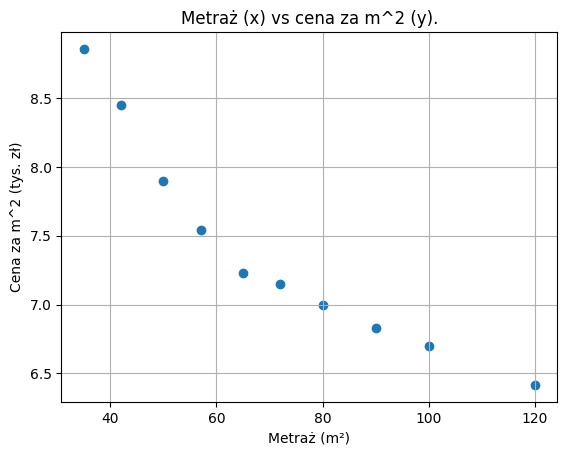

MAE = 1.3429208360570517


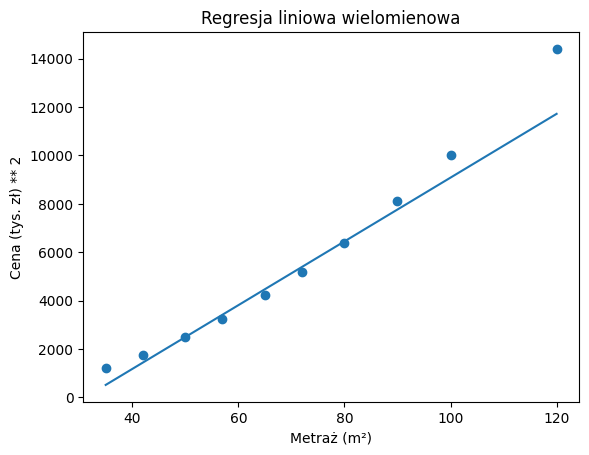

MAE dla regresji wielomianowej = 1.3429208360570517


<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df["cena_za_m2"] = df["cena_tys"] / df["metraz_m2"]

X = df[["metraz_m2"]].values
y2 = df["cena_za_m2"].values

plt.figure()
plt.scatter(X, y2)
plt.xlabel("Metraż (m²)")
plt.ylabel("Cena za m^2 (tys. zł)")
plt.title("Metraż (x) vs cena za m^2 (y).")
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MAE = {MAE}")

df["metraz_m2_2"] = df["metraz_m2"] ** 2
y_poly = df["metraz_m2_2"].values

X_train, X_test, y_poly_train, y_poly_test = train_test_split(X, y_poly)

model_poly = LinearRegression()
model_poly.fit(X_train, y_poly_train)
y_pred_poly = model.predict(X_test)
MAE_poly = mean_absolute_error(y_poly_test, y_pred_poly)

plt.figure()
plt.scatter(X, y_poly, label="Dane")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(x_line, model_poly.predict(x_line), label="Regresja liniowa wielomienowa")
plt.xlabel("Metraż (m²)")
plt.ylabel("Cena (tys. zł) ** 2")
plt.title("Regresja liniowa wielomienowa")
plt.show()
plt.savefig("regresja.png")
print(f"MAE dla regresji wielomianowej = {MAE}")

```python
df["cena_za_m2"] = df["cena_tys"] / df["metraz_m2"]
print(df.head())
```


## 7) Zapisywanie i dzielenie się notatnikiem
- **Plik → Zapisz kopię w GitHubie** (File → Save a copy in GitHub) – wybierz repozytorium i folder.
- **Plik → Pobrane .ipynb** – pobierz notatnik i wgraj go ręcznie do repozytorium GitHub.

## 8) Jak umieścić cały projekt na GitHubie (web UI)
1. Zaloguj się na [github.com](https://github.com).
2. Kliknij **New** i utwórz repozytorium (np. `colab-regresja`).
3. Przeciągnij i upuść pliki z tego projektu: `colab_regresja.ipynb`, `mieszkania.csv`, `README.md`, `requirements.txt`, `.gitignore`.
4. Kliknij **Commit changes**.
5. Wejdź w `colab_regresja.ipynb` i sprawdź podgląd. Jeśli chcesz, skopiuj **RAW URL** do `mieszkania.csv` i użyj go w sekcji „Opcja B”.

> Alternatywa (git w terminalu):
> ```bash
> git init
> git add .
> git commit -m "Inicjalny commit: Colab + regresja liniowa"
> git branch -M main
> git remote add origin https://github.com/<twoj-user>/<twoje-repo>.git
> git push -u origin main
> ```



---
Gotowe! Masz komplet: wiesz jak trafić do **Colab z Gmaila**, uruchomić kod, wykonać prostą **regresję liniową**, a także **opublikować projekt na GitHubie**.
Powodzenia! 🚀
